<a href="https://colab.research.google.com/github/vikas6169/yes-bank-stock-price-prediction/blob/main/Copy_of_Yes_bank(vikas)ipyn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**PROBLEM STATEMENT :**

Yes Bank is a well-known bank in the Indian financial domain. Since 2018, it has been in the
news because of the fraud case involving Rana Kapoor. Owing to this fact, it was interesting
to see how that impacted the stock prices of the company and whether Time series models
or any other predictive models can do justice to such situations. This dataset has monthly
stock prices of the bank since its inception and includes closing, starting, highest, and lowest
stock prices of every month. The main objective is to predict the stock’s closing price of the
month.



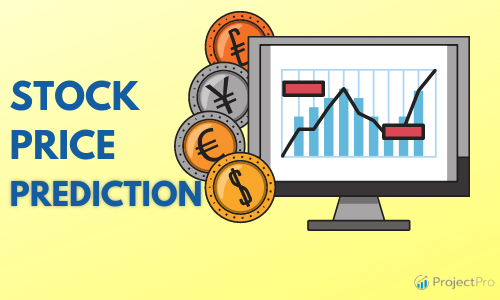

**INTRODUCTION :**

In the Indian financial community, Yes Bank is a well-known bank. It has been in the headlines since 2018 as a result of the Rana Kapoor fraud case. Due to this, it was intriguing to observe how it affected the company's stock prices and whether Time series models or other prediction models could adequately account for such circumstances. Since the bank's founding, this dataset has included closing, starting, highest, and lowest stock prices for each month.

**DATA DESCRIPTION :**

We've the YES BANK Stock price dataset which has the monthly stock prices of the bank since its inception. It contains the following features:

Date: It denotes date of investment done (in our case we have month and year).
Open: Open means the price at which a stock started trading when the opening bell rang.
High: High refer to the maximum prices in a given time period.
Low: Low refer to the minimum prices in a given time period.
Close: Close refers to the price of an individual stock when the stock exchange closed for the day.

**Table of Content :**



*   Data Wrangling

*   EDA Part


*   Building Regressor models


*   Evaluating regressor model



*   Data visualisation


*   Conclusion








**Data Wrangling :**

We import all the necessary library then uploads the given dadtaset and do the data cleaning such that we can use this dataset further for EDA Part.

In [1]:
import numpy as np
import pandas as pd
from numpy import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import matplotlib.pyplot as plt
from datetime import date, timedelta
import holidays
from calendar import monthrange
#from datetime import datetime
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
dataset = pd.read_csv('/content/drive/MyDrive/data_YesBank_StockPrices.csv')

FileNotFoundError: ignored

In [ ]:
dataset.info()

In [ ]:
len(dataset)

In [ ]:
dataset.shape

In [ ]:
dataset.head()

In [ ]:
dataset.describe().T



*   In this dataset, we have 185 rows with 5 columns. No null values Date column in object type so we have to convert it into datetime format.

In [ ]:
# Importing datetime 
from datetime import datetime
# converting date to proper format of date
dataset['Date'] = pd.to_datetime(dataset['Date'].apply(lambda x: datetime.strptime(x, '%b-%y')))



*   Here we are importing datetime so that we can convert the date in to proper 
format of date.We have given date in mmm-yy format then it converted in proper format of yyyy-mm-dd and given date column has dtype as object converting it into date time format.

In [ ]:
# setting date column as an index
dataset.set_index('Date',inplace=True)
dataset.index.freq = 'MS'

The profit or loss calculation is usually determined by the closing price of a stock for the month, hence we will consider the closing price as the target variable.

In [ ]:
plt.figure(figsize=(20,6))
plt.xlabel('Date')
plt.ylabel('"closing Prices')
plt.plot(dataset['Close'])
plt.title('Yes bank closing price')
plt.show()



*   Here in the above graph we can see that stock close prise decreased after year 2018 it is mainly because of Rana Kapoor case and hitted the stock price badly.

In [ ]:
plt.figure(figsize=(20,6))
plt.xlabel('Date')
plt.ylabel('opening  Prices')
plt.plot(dataset['Open'])
plt.title('Yes bank opening price')
plt.show()



*   So here in this graph, we can observe that the graph for Yes bank opening price and Yes bank closing price has same result. Opening price also started increasing in year 2014 and it was at peak in year 2018. But after 2018 it started falling down contineously and came at 0 in year 2020 exactly same as Yes bank closing price.



In [ ]:
#Plot Open vs Close
dataset[['Open','Close']].tail(40).plot(kind='bar',figsize=(20,8))
plt.grid(which='major', linestyle='-', linewidth='0.9', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.9', color='red')
plt.show()



*   Here from the above graph we can conclude the point that the stock price of the YES BANK falls down after the year 2018 and it is not beneficial for investors to invest their money.



In [ ]:
plt.scatter(dataset['Open'],dataset['Close'],alpha = 0.5)
plt.title('scatter plot of Open and Close stock prices of yesbank')
plt.xlabel('Open')
plt.ylabel('Close')
plt.show()

In [ ]:
plt.scatter(dataset['High'],dataset['Low'],alpha = 0.5)
plt.title('scatter plot of High and Low stock prices of yesbank')
plt.xlabel('High')
plt.ylabel('Low')
plt.show()

In [ ]:
plt.scatter(dataset['High'],dataset['Close'],alpha = 0.5)
plt.title('scatter plot of High and Close stock prices of yesbank')
plt.xlabel('High')
plt.ylabel('Close')
plt.show()

In [ ]:
plt.scatter(dataset['Low'],dataset['Close'],alpha = 0.5)
plt.title('scatter plot of Low and Close stock prices of yesbank')
plt.xlabel('Low')
plt.ylabel('Close')
plt.show()



*  In all above scatter plot we can conclude that bivariate analysis shows high correlation of close price with other features, and other features also shows correlation between each other.

In [ ]:
fig=plt.figure(figsize=(15,10))
sns.distplot(dataset['Close'],color="b")
plt.title('Close Data Distribution')
plt.xlabel('Closing Price')
plt.show()

In [ ]:
plt.figure(figsize=(15,10))
sns.distplot(dataset['Open'],color="r")
plt.title('Open price  Data Distribution')
plt.xlabel('Open Price')
plt.show()

In [ ]:
plt.figure(figsize=(15,10))
sns.distplot(dataset['High'],color="g")
plt.title('High price  Data Distribution')
plt.xlabel('High Price')
plt.show()


In [ ]:
plt.figure(figsize=(15,10))
sns.distplot(dataset['Low'],color="c")
plt.title('Low price  Data Distribution')
plt.xlabel('Low Price')
plt.show()

In [ ]:
plt.figure(figsize=(15,8))
sns.heatmap(dataset.corr(), annot= True)



*   From the above heatmap we can conclude that all the features showing high correlation between each other.

*   There are several ways to handle multi-collinearity in the regression.  Principal component analysis and ridge regression are popular used
*   We are going to do lasso and ridge regression for that.






**DATA MODELING**
*   Here we are using Linear Regression machine learning algorithm for building our model.It is a statistical method that is used for predictive analysis.Linear regression algorithm shows a linear relationship between a dependent variable and one or more independent variables, thats why it is called as linear regression.



In [ ]:
#Creating set of numerical features.
numerical_columns=list(dataset.select_dtypes(['int64','float64']).columns)
numerical_features=pd.Index(numerical_columns)
numerical_features



*   Here we converted numerical data type int64 and float64 into object data type so that we can categorise these columns into dependent and independent variable.

In [ ]:
dependent_variable = 'Close'

In [ ]:
independent_variables = list(set(dataset.columns.tolist()) - {dependent_variable})

In [ ]:
independent_variables

In [ ]:
# Creating data of independent variables
X = dataset[independent_variables].values

# Creating dependent variable data
y = dataset[dependent_variable].values

In [ ]:
dataset[independent_variables]

In [ ]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 1)

In [ ]:
X_train[:,0]

In [ ]:
#Looking for shapes of trainig and testing dataset
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

In [ ]:
#Applying linear regression model
lr_model=LinearRegression()
lr_model.fit(X_train,y_train)

In [ ]:
#prediction 
y_pred=lr_model.predict(X_test)

In [ ]:
print('Coefficients: ', lr_model.coef_)

In [ ]:
print("Mean squared error: %.2f" % mean_squared_error(y_test,y_pred))

In [ ]:
print('intercept:', lr_model.intercept_)

In [ ]:
print("R2 score : %.2f" % metrics.r2_score(y_test,y_pred))

In [ ]:
print('Variance score: {}'.format(lr_model.score(X_test, y_test)))

In [ ]:
print('adjusted R2:',1 - (1-lr_model.score(X, y))*(len(y)-1)/(len(y)-X.shape[1]-1))



*   R-squared is the proportion of the variance in the response variable that can be explained by the predictor variables in a linear regression model.
*   The value for R-squared can range from 0 to 1. A value of 0 indicates that the response variable cannot be explained by the predictor variable while a value of 1 indicates that the response variable can be perfectly explained without error by the predictor variables.


*   The adjusted R-squared is a modified version of R-squared that adjusts for the number of predictors in a regression model.
*   Adjusted R2 valu increases when we use valuable feature and decreases when we use not relevant feature. 





In [ ]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

In [ ]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='blue');

**RESIDUAL PLOT**

We are ploting residual plot to evaluate the goodness of our fit for our regression model.

In [ ]:
plt.style.use('fivethirtyeight')
  
plt.figure(figsize=(10,6))
# plotting residual errors in training data
plt.scatter(lr_model.predict(X_train), lr_model.predict(X_train) - y_train,
            color = "red", s = 10, label = 'Train data')
  
# plotting residual errors in test data
plt.scatter(lr_model.predict(X_test), lr_model.predict(X_test) - y_test,
            color = "blue", s = 10, label = 'Test data')
  
# plotting line for zero residual error
plt.hlines(y = 0, xmin = 0, xmax = 350, linewidth = 2)
  

plt.legend(loc = 'upper right')
plt.title("Residual errors")
plt.show()



*  A residual is a measure of how far away a point is vertically from the regression line. It is the error between a predicted value and the observed actual value.



*   Here, in this residual plot it has a high density of points close to the origin and a low density of points away from the origin and also it is symmetric about the origin.



*   This linear model is a good fit for relatively small x-value,but is not a good predictor of larger x-values.







*   Now, applying lasso regression so that we can prevent our dataset to overfit.

In [ ]:
#Applying Lasso Regression model
lasso  = Lasso(alpha=0.010 , max_iter= 3000)

In [ ]:
#Fitting lasso model
lasso.fit(X_train, y_train)

In [ ]:
# prediction for lasso model
y_pred_l = lasso.predict(X_test)

In [ ]:
#performance metrics
print("MSE :",mean_squared_error(y_test, y_pred_l))
print("RMSE :",math.sqrt(mean_squared_error(y_test, y_pred_l)))
print("MAE :",mean_absolute_error(y_test, y_pred_l))
print("R2 :",metrics.r2_score(y_test, y_pred_l))



*    After applying lasso model we have R^2 value 99.7%. It indicates high accuracy of our model. 



**CROSS VALIDATION :**

In cross validation we can perform our model on the new dataset or we can say test dataset.So that we can check our model performance.

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,0.05,1,5,10,20,30,40,45,50,55,60,100]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=3)
lasso_regressor.fit(X_train, y_train)

In [ ]:
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

In [ ]:
#prediction
y_pred_lasso = lasso_regressor.predict(X_test)

In [ ]:
# Test performance
print("MSE :",mean_squared_error(y_test, y_pred_lasso))
print("RMSE :",math.sqrt(mean_squared_error(y_test, y_pred_lasso)))
print("MAE :",mean_absolute_error(y_test, y_pred_lasso))
print("R2 :",metrics.r2_score(y_test, y_pred_lasso))



*  So the conclusion, the R squared value for the test data was 99.7%. This is almost same as in the score from the training dataset which proves that in a dataset we achieve the best fit model.

 

 **IMPLEMENTING RIDGE REGRESSION MODEL**

 We are now applying Ridge Regularization we need to find the optimized penalty coefficient which is represented by alpha. The higher the alpha gets, the stronger becomes the penalty for coefficients





In [ ]:
from sklearn.linear_model import Ridge
ridge  = Ridge()

In [ ]:
#Fitting the model
ridge.fit(X_train,y_train)

In [ ]:
#Score 
ridge.score(X_train, y_train)

In [ ]:
#Prediction
y_pred_r = ridge.predict(X_test)

In [ ]:
# Test performance
print("MSE :",mean_squared_error(y_test, y_pred_r))
print("RMSE :",math.sqrt(mean_squared_error(y_test, y_pred_r)))
print("MAE :",mean_absolute_error(y_test, y_pred_r))
print("R2 :",metrics.r2_score(y_test, y_pred_r))

In [ ]:
# Hyperprarameter tuning
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,8,6,19,20,21,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)
ridge_regressor.fit(X_train,y_train)

In [ ]:
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

In [ ]:
#Model Prediction
y_pred_ridge = ridge_regressor.predict(X_test)

In [ ]:
# Test performance
print("MSE :",mean_squared_error(y_test, y_pred_ridge))
print("RMSE :",math.sqrt(mean_squared_error(y_test, y_pred_ridge)))
print("MAE :",mean_absolute_error(y_test, y_pred_ridge))
print("R2 :",metrics.r2_score(y_test, y_pred_ridge))

\

*   After implementing the best parameters best R^2 score we have 99.78% for Ridge regression model.

**PERFORMANCE VISUALIZATION**

In [ ]:
#prediction
y_pred_1=lr_model.predict(X_test)

In [ ]:
#Linear regression model performance visualization
plt.figure(figsize=(10,8))
plt.plot(y_pred_1)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.xlabel('No of Test Data')
plt.show()

From the above graph we can say that we achieve the almost best fit model for our dataset.

**INFERENCE :**



*   At first we do the data wrangling and then data cleaning and after that we do the EDA part.
*   In EDA part we conclude from our dataset that

    *   Stock close prise decreased after year 2018 it is mainly because of Rana Kapoor case and hitted the stock price badly.
    *   The graph for Yes bank opening price and Yes bank closing price has same result.
    *    The point that the stock price of the YES BANK falls down after the year 2018 and it is not beneficial for investors to invest their money.
    *  From scatter plot we can conclude that bivariate analysis shows high correlation of close price with other features.
    *   All histogram plot shows that all are right skewed.
    *  From heatmap we can conclude that all the features showing high correlation between each other. 


* We implemented linear regression and the accuracy of our linear regression model is 99.78%.


*   After that we visualise the performance of our linear regression model and the graph shows that we achieve the almost best fit model for our dataset.








